<a href="https://www.kaggle.com/code/shpias/data-science-jobs-salary-insights?scriptVersionId=123367926" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-science-job-salaries/ds_salaries.csv


## Importing Data & Basic Insights

In [2]:
#importing data from CSV file
raw_data = pd.read_csv("../input/data-science-job-salaries/ds_salaries.csv")

In [3]:
raw_data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
#importing data using 1st column as index
data=pd.read_csv("../input/data-science-job-salaries/ds_salaries.csv",index_col=0)
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [5]:
data.shape

(607, 11)

In [6]:
data.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [7]:
data.duplicated().sum()

42

In [8]:
data[data.duplicated()]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
217,2021,MI,FT,Data Scientist,76760,EUR,90734,DE,50,DE,L
256,2021,MI,FT,Data Engineer,200000,USD,200000,US,100,US,L
331,2022,SE,FT,Data Analyst,90320,USD,90320,US,100,US,M
332,2022,SE,FT,Data Analyst,112900,USD,112900,US,100,US,M
333,2022,SE,FT,Data Analyst,90320,USD,90320,US,100,US,M
353,2022,SE,FT,Data Scientist,123000,USD,123000,US,100,US,M
362,2022,SE,FT,Data Analyst,130000,USD,130000,CA,100,CA,M
363,2022,SE,FT,Data Analyst,61300,USD,61300,CA,100,CA,M
370,2022,SE,FT,Data Scientist,123000,USD,123000,US,100,US,M
374,2022,MI,FT,ETL Developer,50000,EUR,54957,GR,0,GR,M


In [9]:
df=data.drop_duplicates()

In [10]:
df.duplicated().sum()

0

In [11]:
df.shape

(565, 11)

In [12]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [13]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,565.000000,5.650000e+02,565.000000,565.000000
mean,2021.364602,3.381160e+05,110610.343363,69.911504
std,0.698138,1.599879e+06,72280.702792,40.900666
min,2020.000000,4.000000e+03,2859.000000,0.000000
25%,2021.000000,6.700000e+04,60757.000000,50.000000
50%,2021.000000,1.109250e+05,100000.000000,100.000000
75%,2022.000000,1.650000e+05,150000.000000,100.000000
max,2022.000000,3.040000e+07,600000.000000,100.000000


In [14]:
#earlier one only takes numeric, to take categorical values as well 
df.describe(include="all")

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,565.000000,565,565,565,5.650000e+02,565,565.000000,565,565.000000,565,565
unique,NaN,4,4,50,NaN,17,NaN,57,NaN,50,3
top,NaN,SE,FT,Data Scientist,NaN,USD,NaN,US,NaN,US,M
freq,NaN,243,546,130,NaN,359,NaN,295,NaN,318,290
mean,2021.364602,NaN,NaN,NaN,3.381160e+05,NaN,110610.343363,NaN,69.911504,NaN,NaN
std,0.698138,NaN,NaN,NaN,1.599879e+06,NaN,72280.702792,NaN,40.900666,NaN,NaN
min,2020.000000,NaN,NaN,NaN,4.000000e+03,NaN,2859.000000,NaN,0.000000,NaN,NaN
25%,2021.000000,NaN,NaN,NaN,6.700000e+04,NaN,60757.000000,NaN,50.000000,NaN,NaN
50%,2021.000000,NaN,NaN,NaN,1.109250e+05,NaN,100000.000000,NaN,100.000000,NaN,NaN
75%,2022.000000,NaN,NaN,NaN,1.650000e+05,NaN,150000.000000,NaN,100.000000,NaN,NaN


In [15]:
#checking the values within the column job_title
df['job_title'].value_counts().head()

Data Scientist               130
Data Engineer                121
Data Analyst                  82
Machine Learning Engineer     39
Research Scientist            16
Name: job_title, dtype: int64

In [16]:
#checking the values within the column work_year
df['work_year'].value_counts()

2022    278
2021    215
2020     72
Name: work_year, dtype: int64

In [17]:
#changing work year data into string value to make sure that it will not be treated as intger
#df['work_year']=pd.to_datetime(df['work_year'],format='%Y').dt.year
df['work_year']=df['work_year'].astype(str)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
df['work_year'].dtypes

dtype('O')

In [19]:
df['experience_level'].value_counts()

SE    243
MI    208
EN     88
EX     26
Name: experience_level, dtype: int64

In [20]:
dss=df[df['job_title']=='Data Scientist']
dss
#dss.shape

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
10,2020,EN,FT,Data Scientist,45000,EUR,51321,FR,0,FR,S
11,2020,MI,FT,Data Scientist,3000000,INR,40481,IN,0,IN,L
12,2020,EN,FT,Data Scientist,35000,EUR,39916,FR,0,FR,M
...,...,...,...,...,...,...,...,...,...,...,...
559,2022,SE,FT,Data Scientist,140400,USD,140400,US,0,US,M
570,2022,SE,FT,Data Scientist,210000,USD,210000,US,100,US,M
593,2022,SE,FT,Data Scientist,150000,USD,150000,US,100,US,M
598,2022,MI,FT,Data Scientist,160000,USD,160000,US,100,US,M


In [21]:
dss.shape

(130, 11)

In [22]:
dss['company_location'].value_counts().max()

72

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

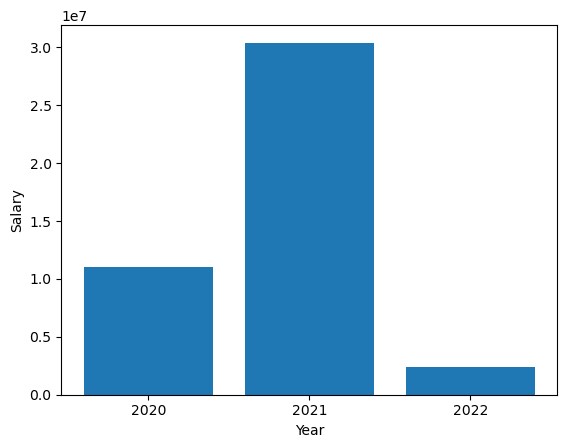

In [24]:
fig, ax = plt.subplots()
ax.bar(dss['work_year'],dss['salary'])

ax.set_xlabel("Year")
ax.set_ylabel("Salary")

plt.show()

Yet to complete

In [25]:
#sns.countplot(x="employee_residence",data=dss)

In [26]:
df.corr()

,salary,salary_in_usd,remote_ratio
salary,1.000000,-0.083728,-0.012279
salary_in_usd,-0.083728,1.000000,0.122849
remote_ratio,-0.012279,0.122849,1.000000


<AxesSubplot:>

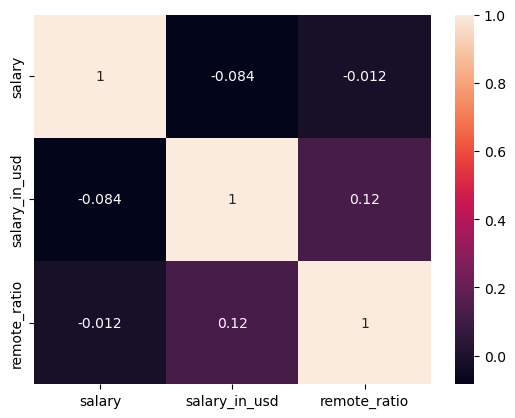

In [27]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='employment_type', ylabel='count'>

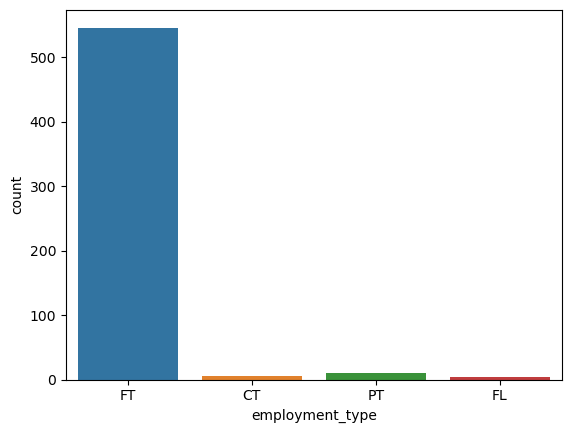

In [28]:
sns.countplot(x=df['employment_type'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='work_year', ylabel='full_time'>

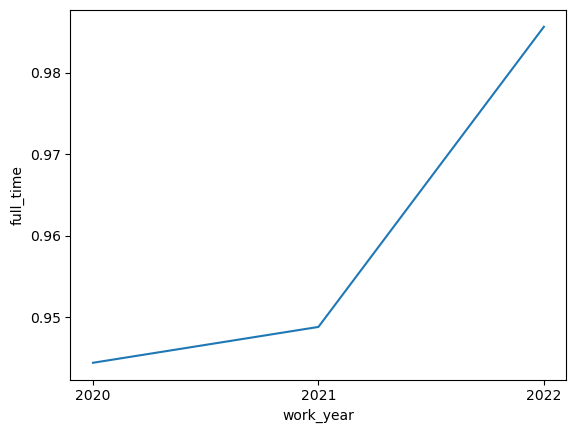

In [29]:
df['full_time']=df['employment_type']=='FT'
prop_full_time = df.groupby('work_year',as_index=False)['full_time'].mean()

sns.lineplot(x='work_year',y='full_time',data=prop_full_time)

#### Observing the Proportion of Data Scientist Job holders over the year

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


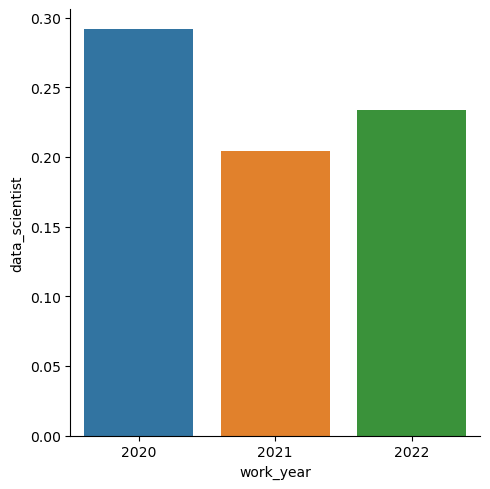

In [30]:
df['data_scientist']=df['job_title']=='Data Scientist'
prop_data_scientist = df.groupby('work_year',as_index=False)['data_scientist'].mean()

prop_data_scientist
sns.catplot(x='work_year',y='data_scientist',data=prop_data_scientist,kind='bar')

In [31]:
#df['data_analyst']=df['job_title']=='Data Analyst'
prop_data_scientist_category = df.groupby(['work_year','experience_level'],as_index=False)['data_scientist'].mean()

prop_data_scientist_category

,work_year,experience_level,data_scientist
0,2020,EN,0.300000
1,2020,EX,0.000000
2,2020,MI,0.343750
3,2020,SE,0.222222
4,2021,EN,0.234043
5,2021,EX,0.000000
6,2021,MI,0.295455
7,2021,SE,0.101449
8,2022,EN,0.238095
9,2022,EX,0.000000


Showing proportion of different experience level data scientists over the year

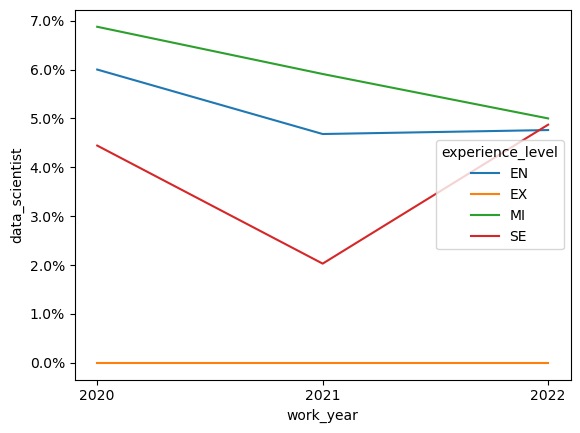

In [32]:
ax=sns.lineplot(x='work_year',y='data_scientist',data=prop_data_scientist_category, hue='experience_level')
from matplotlib.ticker import PercentFormatter

ax.yaxis.set_major_formatter(PercentFormatter(5.0))

## Train & Test 

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [34]:
ddf = df.drop(['experience_level'],axis=1)
y = ddf['salary_in_usd']
x=ddf.drop(['salary_in_usd'],axis=1)

x_test,x_train,y_test,y_train = train_test_split(x,y,test_size=.20,random_state=912)

In [35]:
x_test.shape
#type(x_train)

(452, 11)

In [36]:
y_test.shape
#type(y_train)

(452,)

Yet to complete